In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

Task 1: Exploratory Data Analysis (EDA)

In [4]:
# Load Titanic dataset
train_data = pd.read_csv('/content/Titanic_train.csv')
test_data = pd.read_csv('/content/Titanic_test.csv')

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
# Check for missing values in train and test datasets
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


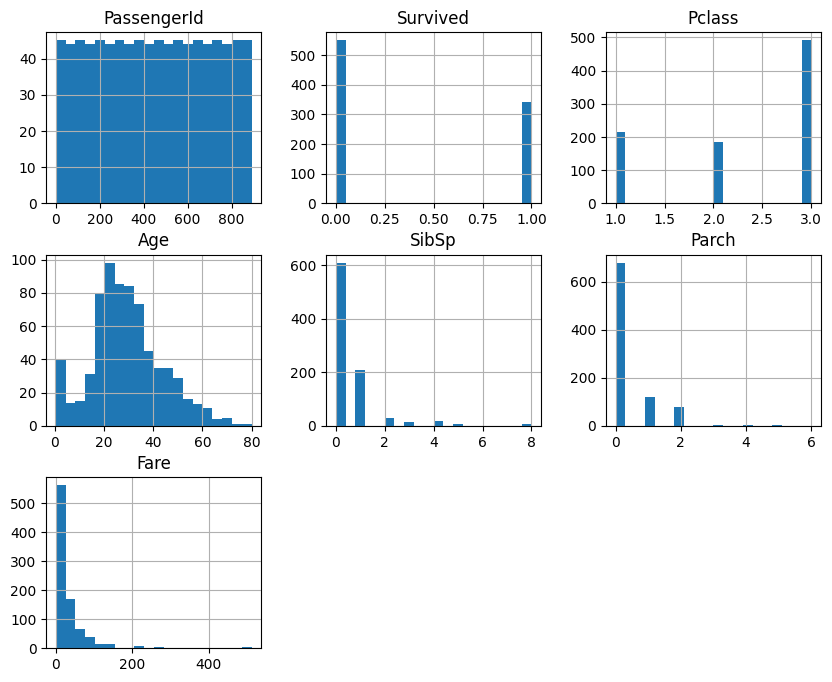

In [12]:
# Plot histograms for numerical columns
train_data.hist(bins=20, figsize=(10, 8))
plt.show()

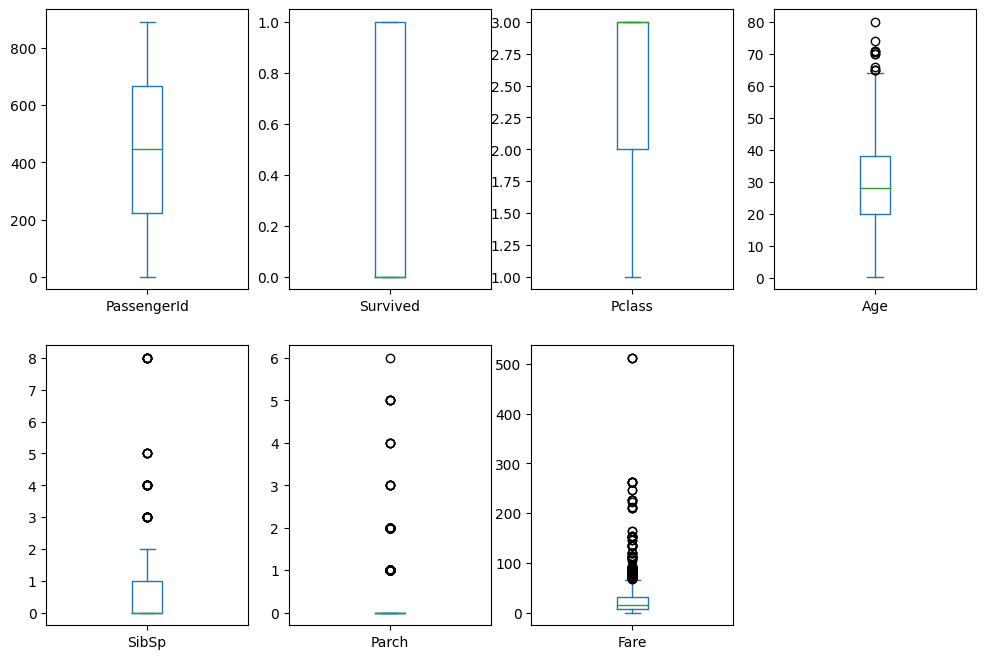

In [13]:
# Plot box plots for numerical columns
train_data.plot(kind='box', subplots=True, layout=(2,4), figsize=(12,8), sharex=False, sharey=False)
plt.show()

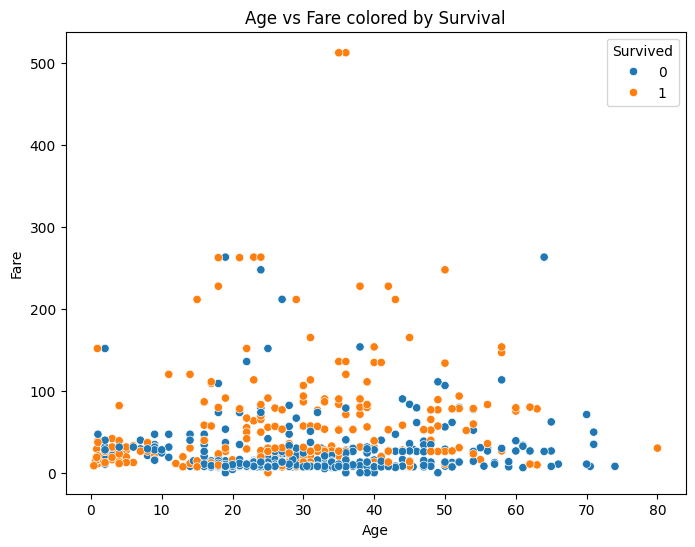

In [14]:
# Scatter plot for Age vs Fare
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data)
plt.title('Age vs Fare colored by Survival')
plt.show()

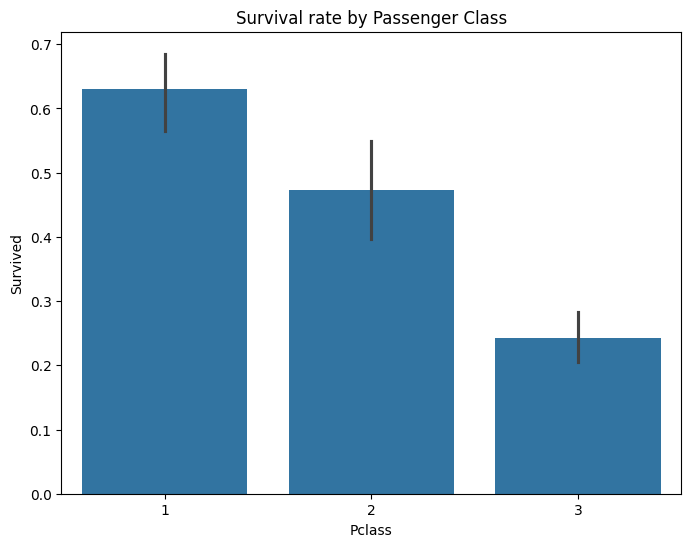

In [15]:
# Bar plot for Pclass vs Survival
plt.figure(figsize=(8,6))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival rate by Passenger Class')
plt.show()

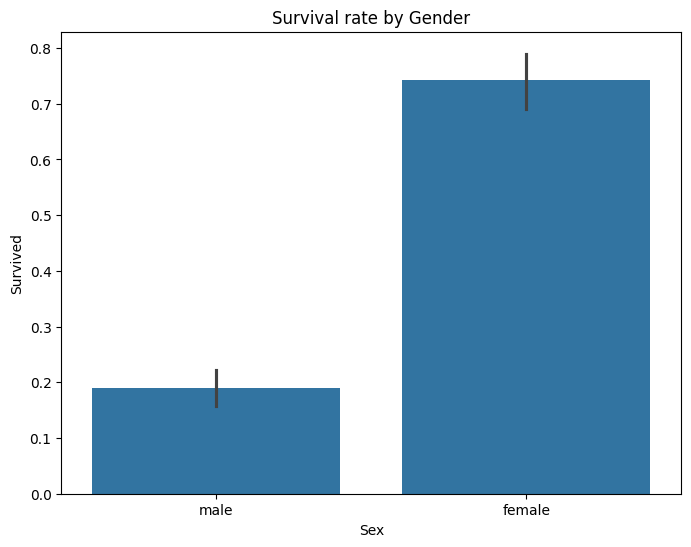

In [16]:
# Bar plot for Sex vs Survival
plt.figure(figsize=(8,6))
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival rate by Gender')
plt.show()

Task 2: Data Preprocessing

In [17]:
# Fill missing values
imputer = SimpleImputer(strategy='median')
train_data['Age'] = imputer.fit_transform(train_data[['Age']])
test_data['Age'] = imputer.transform(test_data[['Age']])

In [18]:
# Fill missing values in Embarked
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [19]:
# Encode categorical variables
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])

In [20]:
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])
test_data['Embarked'] = label_encoder.transform(test_data['Embarked'])

In [21]:
# Drop columns that won't be used
train_data = train_data.drop(['Cabin', 'Name', 'Ticket'], axis=1)
test_data = test_data.drop(['Cabin', 'Name', 'Ticket'], axis=1)

In [22]:
# Separate features and target variable
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [23]:
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Task 3: Building Predictive Models

In [24]:
# Create and train LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [25]:
# Make predictions
y_pred_lgb = lgb_model.predict(X_val)


In [26]:
# Evaluate the LightGBM model
accuracy_lgb = accuracy_score(y_val, y_pred_lgb)
precision_lgb = precision_score(y_val, y_pred_lgb)
recall_lgb = recall_score(y_val, y_pred_lgb)
f1_lgb = f1_score(y_val, y_pred_lgb)

In [27]:
print(f"LightGBM Model - Accuracy: {accuracy_lgb}, Precision: {precision_lgb}, Recall: {recall_lgb}, F1 Score: {f1_lgb}")

LightGBM Model - Accuracy: 0.8100558659217877, Precision: 0.7777777777777778, Recall: 0.7567567567567568, F1 Score: 0.7671232876712328


In [28]:
# Create and train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [29]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_val)

In [30]:
# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
precision_xgb = precision_score(y_val, y_pred_xgb)
recall_xgb = recall_score(y_val, y_pred_xgb)
f1_xgb = f1_score(y_val, y_pred_xgb)

In [31]:
print(f"XGBoost Model - Accuracy: {accuracy_xgb}, Precision: {precision_xgb}, Recall: {recall_xgb}, F1 Score: {f1_xgb}")

XGBoost Model - Accuracy: 0.7877094972067039, Precision: 0.7571428571428571, Recall: 0.7162162162162162, F1 Score: 0.736111111111111


Task 4: Comparative Analysis

In [32]:
# Compare performance of LightGBM and XGBoost models
performance_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'LightGBM': [accuracy_lgb, precision_lgb, recall_lgb, f1_lgb],
    'XGBoost': [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb]
}

performance_df = pd.DataFrame(performance_data)

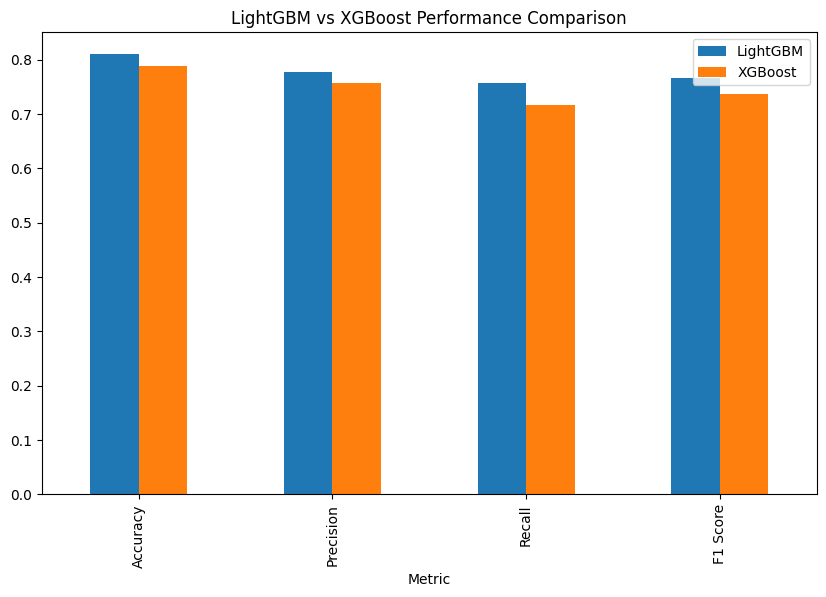

In [33]:
# Plot the comparison
performance_df.plot(x='Metric', kind='bar', figsize=(10,6))
plt.title('LightGBM vs XGBoost Performance Comparison')
plt.show()